<a href="https://colab.research.google.com/github/lrupp25/Data2000HW/blob/main/NeuralNetworkHW10_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo

In [6]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
x = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets


In [7]:
x.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


1. Feature Selection

In [19]:
data = x.loc[:, [ 'HighBP', 'HighChol', 'BMI','PhysActivity', 'MentHlth', 'Age', 'Income', 'PhysHlth']]
data.head()

,HighBP,HighChol,BMI,PhysActivity,MentHlth,Age,Income,PhysHlth
0,1,1,40,0,18,9,3,15
1,0,0,25,1,0,7,1,0
2,1,1,28,0,30,9,8,30
3,1,0,27,1,0,11,6,0
4,1,1,24,1,3,11,4,0


Since I wanted to create a neural network which gave the best results, I chose the variables I beleived would contribute the most, as such I included those. The ones I expect to contribute the most are BMI and PhysActivity, as to me BMI is a usual sign of other lifestyle habits that may lead to diabetes.

2. Data Cleaning
As lazy as it may seem, this data set is very clean already, as all the variables are dummy encoded already, such as HighBP and HighChol, or they are already bucketized like Age, whose example buckets were 1 (18-24) to 13 (80+).
As such, I do not believe it necessary to do any data cleaning at all. Below is simply some exploratory inputs to make sure there are no issues.

In [20]:
data['MentHlth'].describe()

count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

In [21]:
data['HighBP'].unique()

array([1, 0])

3. Feature Engineering
This is an interesting dataset to try to do feature engineering for. I decided to go for a column that signified when someone has both good mental and physical health, which I decided was under 7. I also corrected the "unhealth_old" column by way of using the bukcetized numbers.  Sorry if it was not enough for feature engineering, I genuinley couldn't think of much without stealing from the class examples.

In [22]:
data['GoodHlth'] = ((data['MentHlth'] < 7) & (data['PhysHlth'] < 7)).astype(int)
data.head()

,HighBP,HighChol,BMI,PhysActivity,MentHlth,Age,Income,PhysHlth,GoodHlth
0,1,1,40,0,18,9,3,15,0
1,0,0,25,1,0,7,1,0,1
2,1,1,28,0,30,9,8,30,0
3,1,0,27,1,0,11,6,0,1
4,1,1,24,1,3,11,4,0,1


In [26]:
data['unhealthy_old'] = ((data['PhysHlth'] > 12) & (data['Age'] > 9)).astype(int)
data.head(30)

,HighBP,HighChol,BMI,PhysActivity,MentHlth,Age,Income,PhysHlth,GoodHlth,unhealthy_old
0,1,1,40,0,18,9,3,15,0,0
1,0,0,25,1,0,7,1,0,1,0
2,1,1,28,0,30,9,8,30,0,0
3,1,0,27,1,0,11,6,0,1,0
4,1,1,24,1,3,11,4,0,1,0
5,1,1,25,1,0,10,8,2,1,0
6,1,0,30,0,0,9,7,14,0,0
7,1,1,25,1,0,11,4,0,1,0
8,1,1,30,0,30,9,1,30,0,0
9,0,0,24,0,0,8,3,0,1,0


4. Neural Networking Time!

creating training and testing data as always

In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.2)

X_train.describe()

,HighBP,HighChol,BMI,PhysActivity,MentHlth,Age,Income,PhysHlth,GoodHlth,unhealthy_old
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.429887,0.424556,28.383096,0.756218,3.183124,8.033940,6.056257,4.242550,0.747221,0.054675
std,0.495061,0.494277,6.598045,0.429363,7.406319,3.055268,2.070881,8.719898,0.434606,0.227346
min,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,24.000000,1.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,27.000000,1.000000,0.000000,8.000000,7.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,31.000000,1.000000,2.000000,10.000000,8.000000,3.000000,1.000000,0.000000
max,1.000000,1.000000,98.000000,1.000000,30.000000,13.000000,8.000000,30.000000,1.000000,1.000000


this wild stuff

In [28]:
import tensorflow as tf

In [29]:
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
  df = dataframe.copy()
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [30]:
inputs = {
    'Age':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Age'),
    'BMI':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='BMI'),
    'GoodHlth':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='overall_health'),
    'HighChol':
       tf.keras.layers.Input(
          shape=(1,),
          dtype=tf.float32,
          name='HighChol'),
    'HighBP':
       tf.keras.layers.Input(
          shape=(1,),
          dtype=tf.float32,
          name='HighBP'
       )
}

In [31]:
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('Age'), inputs.get('BMI'), inputs.get('GoodHlth'), inputs.get('HighChol'), inputs.get('HighBP')])

hidden1 = tf.keras.layers.Dense(
    units=32, name='hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
  units=8, name='hidden2')(hidden1)

dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(hidden2)

outputs = {
'dense_output': dense_output
}

In [33]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    # ???
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    # Binary crossentropy
    loss=tf.keras.losses.BinaryCrossentropy(),
    # Precision, Recall, F1
    metrics=[tf.keras.metrics.F1Score()]
)

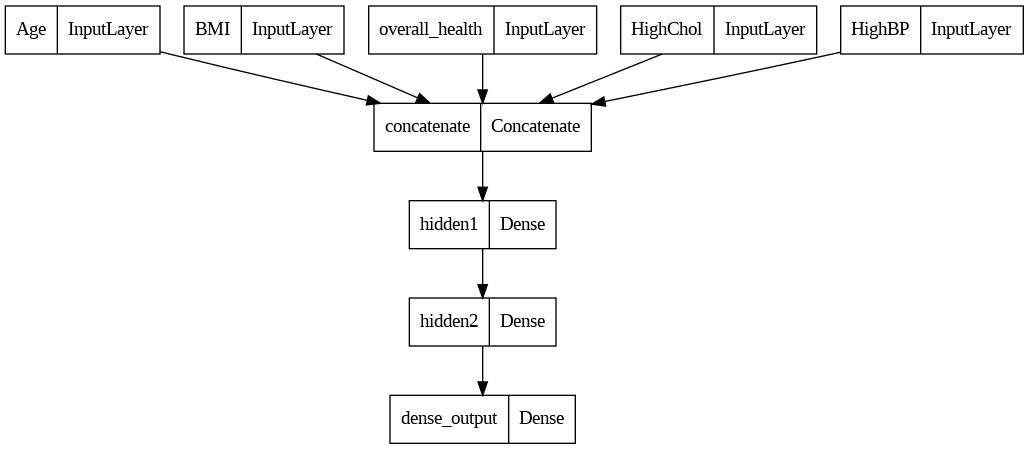

In [34]:
tf.keras.utils.plot_model(dnn_model)

In [36]:
import numpy as np

In [43]:
tf.config.run_functions_eagerly(True)

womp_womp = dnn_model.fit(
    {name:np.array(value) for name, value in X_train.items()},
    np.array(y_train.values),
    epochs=15,
    batch_size=1000,
    shuffle=True,
    validation_split=0.2
)

# Get details that will be useful for plotting the loss curve.
epochs = womp_womp.epoch
hist = pd.DataFrame(womp_womp.history)
mse = hist["mean_squared_error"]

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['PhysActivity', 'MentHlth', 'Income', 'PhysHlth', 'unhealthy_old'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


ValueError: ignored

shucks travis